In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


0. Preprocessing

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

In [8]:
import matplotlib.pyplot as plt

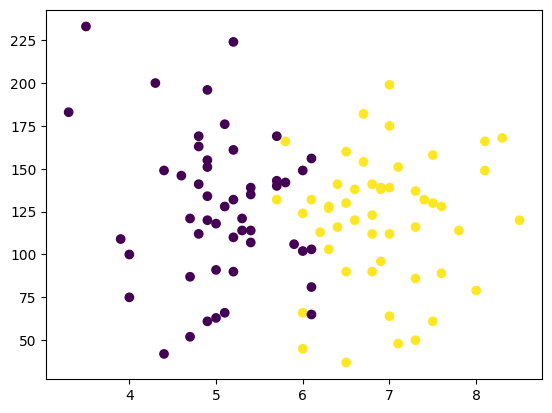

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

1. Extract input and Output Cols

In [11]:
X=df.iloc[:,0:2]

In [12]:
Y=df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

3. Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
70,6.3,127.0
36,5.7,140.0
28,5.2,90.0
80,4.9,196.0
19,5.2,132.0
...,...,...
68,4.0,75.0
95,4.3,200.0
93,6.8,112.0
1,5.9,106.0


In [19]:
y_test

49    0
44    1
78    0
42    1
45    1
81    0
94    0
66    1
92    0
48    1
Name: placement, dtype: int64

In [20]:
x_test

,cgpa,iq
49,5.4,135.0
44,7.5,61.0
78,6.1,81.0
42,7.6,89.0
45,6.0,66.0
81,5.4,107.0
94,4.7,52.0
66,6.9,96.0
92,5.2,110.0
48,6.6,138.0


4. Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalar=StandardScaler()

In [23]:
x_train=scalar.fit_transform(x_train)

In [24]:
x_test=scalar.transform(x_test)

5. Train Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf=LogisticRegression()

In [27]:
clf.fit(x_train,y_train)

LogisticRegression()

5. Evaluate the Model

In [31]:
y_predict=clf.predict(x_test)

In [30]:
y_test

49    0
44    1
78    0
42    1
45    1
81    0
94    0
66    1
92    0
48    1
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_predict)

0.9

Visualize the pattern 

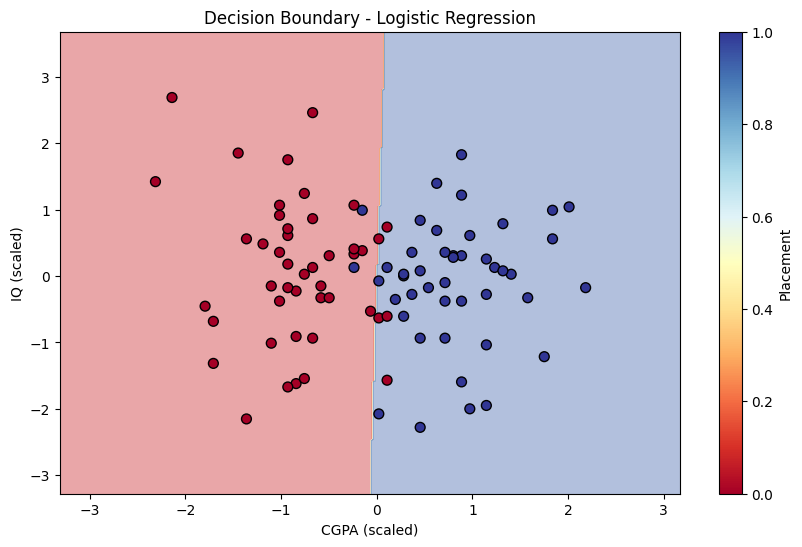

In [41]:
# Alternative visualization without mlxtend (compatibility issue with sklearn)
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid to plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.values, cmap='RdYlBu', edgecolors='black', s=50)
plt.xlabel('CGPA (scaled)')
plt.ylabel('IQ (scaled)')
plt.title('Decision Boundary - Logistic Regression')
plt.colorbar(label='Placement')
plt.show()


In [42]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))
# model.predict(scalar.transform([[8.5,90]]))